In [151]:
import matplotlib.pyplot as plt
import numpy as np
from math import pow, cos, sin, sqrt, pi, sqrt
import scipy as sp
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import time

In [152]:
Nx=15
Ny=15
a=1
V0=-10
Vn=0
t=1

In [153]:
kx=np.zeros(Nx)
ky=np.zeros(Ny)
        
for rx in range(0,Nx):
    kx[rx] = -pi/a + 2*pi*(rx)/(a*(Nx-1))
for ry in range(0,Ny):
    ky[ry] = -pi/a + 2*pi*(ry)/(a*(Ny-1))

In [154]:
kx
#se nota que kx[7]=0

array([-3.14159265, -2.6927937 , -2.24399475, -1.7951958 , -1.34639685,
       -0.8975979 , -0.44879895,  0.        ,  0.44879895,  0.8975979 ,
        1.34639685,  1.7951958 ,  2.24399475,  2.6927937 ,  3.14159265])

In [155]:
ky

array([-3.14159265, -2.6927937 , -2.24399475, -1.7951958 , -1.34639685,
       -0.8975979 , -0.44879895,  0.        ,  0.44879895,  0.8975979 ,
        1.34639685,  1.7951958 ,  2.24399475,  2.6927937 ,  3.14159265])

In [156]:
#se construye la matriz que se usará para relacionar los indices de V(i,j) con sus valores dados
p=np.zeros(Nx*Ny)
b=0
for rx in range(0,Nx):
    for ry in range(0,Ny):
        p[b]=b
        b=b+1
q = np.zeros((Nx,Ny))
c=0
for nx in range(0,Nx):
    for ny in range(0,Ny):
        q[nx][ny] = p[c]
        c=c+1

In [157]:
q
#se nota que q[7][7] = 112, es decir que el valor i(7,7)=112, y como kx[7]=0, entonces i=112 es el vector momento nulo

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.],
       [ 15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
         26.,  27.,  28.,  29.],
       [ 30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,
         41.,  42.,  43.,  44.],
       [ 45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.],
       [ 60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
         71.,  72.,  73.,  74.],
       [ 75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,
         86.,  87.,  88.,  89.],
       [ 90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
        101., 102., 103., 104.],
       [105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
        116., 117., 118., 119.],
       [120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
        131., 132., 133., 134.],
       [135., 136., 137., 138., 139.,

In [158]:
#se define la matriz i y j de dimension NxN=N**2
def i(rx,ry):
    return q[rx,ry]
def j(rx,ry):
    return q[rx,ry]

In [159]:
i(0,0)
#indica el item ubicado en la posición (0,0) en la matriz q

0.0

In [160]:
j(0,0)
#indica el item ubicado en la posición (0,0) en la matriz q

0.0

In [161]:
#relacionamos cada elemento de la matriz con sus indices
def find(element, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == element:
                return (i, j)

In [162]:
#mostramos la matriz N**2 X N**2
def V(i,j):
    k1=find(i,q)
    k2=find(j,q)
    
    kx1=kx[k1[0]]
    ky1=ky[k1[1]]
    
    kx2=kx[k2[0]]
    ky2=ky[k2[1]]
    return V0+Vn*(cos((kx1-kx2)*a)+cos((ky1-ky2)*a))

In [163]:
V(112,112)
#112 es el número en la tabla de valores de q en donde ambos componentes del vector momentum son cero
#solo en la cadena de momentos usamos kx[7] = 0, para el momento nulo usamos i=112 

-10.0

In [164]:
#se muestra la función V en forma matricial
Vm = np.zeros((Nx**2,Ny**2))
for m in range(0,Nx*Nx):
    for n in range(0,Ny*Ny):
        Vm[m][n] = V(m,n)

In [165]:
Vm
#se ve que debido a que Vn=0 y V0=-10, entonces todos los elementos
#de la matriz potencial será igual a -10

array([[-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       ...,
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.]])

In [166]:
#mostramos la función de energía cinética E
def E(i):
    k1=find(i,q)
    
    kx1=kx[k1[0]]
    ky1=ky[k1[1]]
    return -2*t*(cos(kx1*a)+cos(ky1*a))

In [167]:
E(112)
#ya que en el array de kx[7]=0, y el 112 se ubica en la posición 7,7 de la tabla de valores q

-4.0

In [168]:
#se añade un factor complejo a la energía
eta = 0.1
cpj= complex(0,1)

In [169]:
#mostramos la función K, que depende de w
def K(i,j,w):
    return V(i,j)/((w-2*E(j)+cpj*eta))

In [170]:
K(112,112,1)

(-1.11097395383286+0.012344155042587335j)

In [171]:
#se da a función K en forma matricial que depende de w
U = np.zeros((Nx**2, Ny**2), dtype=complex)
def Km(w):
    for nx in range(0,Nx**2):
        for ny in range(0,Ny**2):
            U[nx][ny] = K(nx,ny,w)
#    print(U[112][112])
    return U

In [172]:
Km(1)

array([[1.42827994+0.020404j  , 1.51391521+0.02292465j,
        1.81957813+0.03311961j, ..., 1.81957813+0.03311961j,
        1.51391521+0.02292465j, 1.42827994+0.020404j  ],
       [1.42827994+0.020404j  , 1.51391521+0.02292465j,
        1.81957813+0.03311961j, ..., 1.81957813+0.03311961j,
        1.51391521+0.02292465j, 1.42827994+0.020404j  ],
       [1.42827994+0.020404j  , 1.51391521+0.02292465j,
        1.81957813+0.03311961j, ..., 1.81957813+0.03311961j,
        1.51391521+0.02292465j, 1.42827994+0.020404j  ],
       ...,
       [1.42827994+0.020404j  , 1.51391521+0.02292465j,
        1.81957813+0.03311961j, ..., 1.81957813+0.03311961j,
        1.51391521+0.02292465j, 1.42827994+0.020404j  ],
       [1.42827994+0.020404j  , 1.51391521+0.02292465j,
        1.81957813+0.03311961j, ..., 1.81957813+0.03311961j,
        1.51391521+0.02292465j, 1.42827994+0.020404j  ],
       [1.42827994+0.020404j  , 1.51391521+0.02292465j,
        1.81957813+0.03311961j, ..., 1.81957813+0.03311961j,
 

In [173]:
#se define la matriz identidad
I = np.zeros((Nx**2,Ny**2), dtype=complex)
for nx in range(0,Nx**2):
    I[nx][nx] = 1.0

In [174]:
#se define la matriz T
def T(w):
    K2 = (I-Km(w))
    K3 = np.linalg.inv(K2) #matriz inversa
    K4 = np.dot(Vm, K3) #producto matricial
    return K4[112][112].imag #solo se estan tomando los valores donde ambos momentos son iguales a cero, se usa la parte imaginaria

In [175]:
x = np.linspace(-15,5,80)

In [176]:
# se añade un algoritmo para medir el tiempo de compilacion
st = time.time()

#algoritmo para generar los valores de la cadena para T(w)

R =np.zeros(len(x))
for z in range(len(x)):
    R[z] = T(x[z])
    
    
    


# espera por 3 segundos
time.sleep(3)


# se obtiene el tiempo final
et = time.time()

# se tiene el tiempo de ejecución
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 381.87247347831726 seconds


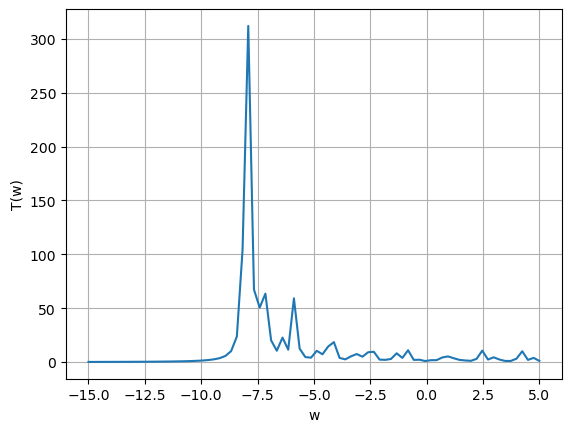

In [177]:
plt.plot(x, R)
plt.grid()
plt.xlabel('w')
plt.ylabel('T(w)')
plt.show()